In [138]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from modules.load import *


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [390]:
sns.set()

In [391]:
df_train = load("data/train.csv")

In [392]:
df_test = load("data/test.csv")

In [393]:
show(df_train)

dara shape==>
 (891, 12)
------------------------------
index ==>
 RangeIndex(start=0, stop=891, step=1)
------------------------------
column ==>
 Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
------------------------------
dtype==>
 PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
------------------------------
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Ow

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [394]:
df_train.Sex.unique()

array(['male', 'female'], dtype=object)

In [395]:
df_train.loc[df_train.Sex=="male","Sex"] = 0 #loc[行,列] Sexの値がmaleのところを0に変換
df_train.loc[df_train.Sex =="female","Sex"] =1
df_test.loc[df_test.Sex=="male","Sex"] = 0 #loc[行,列] Sexの値がmaleのところを0に変換
df_test.loc[df_test.Sex =="female","Sex"] =1

In [396]:
df_train["cluster_age"] = df_train.Age

In [397]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,cluster_age
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,714.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,29.699118
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,14.526497
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.420000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,20.125000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,28.000000
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,38.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,80.000000


In [398]:
df_train.loc[(df_train.cluster_age>=0) & (df_train.cluster_age<=20),"cluster_age"]=0
df_train.loc[(df_train.cluster_age>20) & (df_train.cluster_age<=45),"cluster_age"]=1
df_train.loc[(df_train.cluster_age>45),"cluster_age"]=2

In [399]:
df_train.cluster_age

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
886    1.0
887    0.0
888    NaN
889    1.0
890    1.0
Name: cluster_age, Length: 891, dtype: float64

In [400]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cluster_age
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,1.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,1.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,NaN,S,1.0
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,S,0.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,NaN,1,2,W./C. 6607,23.4500,NaN,S,NaN
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C148,C,1.0


In [401]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,cluster_age
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,714.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.893557
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.619811
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,0.250000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.000000
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,2.000000


In [402]:
df_train.describe(include="O")

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Asplund, Master. Clarence Gustaf Hugo",0,CA. 2343,B96 B98,S
freq,1,577,7,4,644


In [111]:
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",0,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",1,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",0,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",0,NaN,0,0,359309,8.0500,NaN,S


In [73]:
df_train.Sex

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    1
889    0
890    0
Name: Sex, Length: 891, dtype: object

In [74]:
col = ["Pclass","Sex","SibSp","Parch","Embarked","Survived"]

In [112]:
test_col=["Pclass","Sex","SibSp","Parch","Embarked"]

In [75]:
df = df_train[col]

In [113]:
df_fin = df_test[test_col]

In [76]:
df

,Pclass,Sex,SibSp,Parch,Embarked,Survived
0,3,0,1,0,S,0
1,1,1,1,0,C,1
2,3,1,0,0,S,1
3,1,1,1,0,S,1
4,3,0,0,0,S,0
...,...,...,...,...,...,...
886,2,0,0,0,S,0
887,1,1,0,0,S,1
888,3,1,1,2,S,0
889,1,0,0,0,C,1


In [114]:
df_fin

,Pclass,Sex,SibSp,Parch,Embarked
0,3,0,0,0,Q
1,3,1,1,0,S
2,2,0,0,0,Q
3,3,0,0,0,S
4,3,1,1,1,S
...,...,...,...,...,...
413,3,0,0,0,S
414,1,1,0,0,C
415,3,0,0,0,S
416,3,0,0,0,S


In [115]:
null_table(df_fin)

,欠損数,%
Pclass,0,0.0
Sex,0,0.0
SibSp,0,0.0
Parch,0,0.0
Embarked,0,0.0


In [116]:
null_table(df)

,欠損数,%
Pclass,0,0.0
Sex,0,0.0
SibSp,0,0.0
Parch,0,0.0
Embarked,0,0.0
Survived,0,0.0
Age,0,0.0


In [78]:
df = df.dropna()

In [79]:
null_table(df)

,欠損数,%
Pclass,0,0.0
Sex,0,0.0
SibSp,0,0.0
Parch,0,0.0
Embarked,0,0.0
Survived,0,0.0


In [81]:
label_encode(df)

choice label encode colmuns !
['Pclass' 'Sex' 'SibSp' 'Parch' 'Embarked' 'Survived']
Embarked


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/ryusei/Desktop/mygit/python_module/lab/データサイエンス/modules/load.py:148: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.transform(df[col])
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

,Pclass,Sex,SibSp,Parch,Embarked,Survived
0,3,0,1,0,2,0
1,1,1,1,0,0,1
2,3,1,0,0,2,1
3,1,1,1,0,2,1
4,3,0,0,0,2,0
...,...,...,...,...,...,...
886,2,0,0,0,2,0
887,1,1,0,0,2,1
888,3,1,1,2,2,0
889,1,0,0,0,0,1


In [117]:
label_encode(df_fin)

choice label encode colmuns !
['Pclass' 'Sex' 'SibSp' 'Parch' 'Embarked']
Embarked


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/ryusei/Desktop/mygit/python_module/lab/データサイエンス/modules/load.py:148: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.transform(df[col])
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

,Pclass,Sex,SibSp,Parch,Embarked
0,3,0,0,0,1
1,3,1,1,0,2
2,2,0,0,0,1
3,3,0,0,0,2
4,3,1,1,1,2
...,...,...,...,...,...
413,3,0,0,0,2
414,1,1,0,0,0
415,3,0,0,0,2
416,3,0,0,0,2


In [82]:
df["Age"] = df_train.Age

/Users/ryusei/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [83]:
df

,Pclass,Sex,SibSp,Parch,Embarked,Survived,Age
0,3,0,1,0,2,0,22.0
1,1,1,1,0,0,1,38.0
2,3,1,0,0,2,1,26.0
3,1,1,1,0,2,1,35.0
4,3,0,0,0,2,0,35.0
...,...,...,...,...,...,...,...
886,2,0,0,0,2,0,27.0
887,1,1,0,0,2,1,19.0
888,3,1,1,2,2,0,NaN
889,1,0,0,0,0,1,26.0


In [84]:
df_age = df.Age

In [85]:
df_age.mean()

29.64209269662921

In [87]:
type(df_age)

pandas.core.series.Series

In [91]:
df_age = df_age.fillna(df_age.mean())

In [92]:
df_age

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.642093
889    26.000000
890    32.000000
Name: Age, Length: 889, dtype: float64

In [93]:
df = delete(df)

colmuns
↓

1 : Pclass
2 : Sex
3 : SibSp
4 : Parch
5 : Embarked
6 : Survived
7 : Age
----------------------------------------------------------
What colmundo you want to kill ?:7
----------------------------------------------------------
Age is deleted


In [96]:
df["Age"] = df_age

In [97]:
df

,Pclass,Sex,SibSp,Parch,Embarked,Survived,Age
0,3,0,1,0,2,0,22.000000
1,1,1,1,0,0,1,38.000000
2,3,1,0,0,2,1,26.000000
3,1,1,1,0,2,1,35.000000
4,3,0,0,0,2,0,35.000000
...,...,...,...,...,...,...,...
886,2,0,0,0,2,0,27.000000
887,1,1,0,0,2,1,19.000000
888,3,1,1,2,2,0,29.642093
889,1,0,0,0,0,1,26.000000


In [98]:
null_table(df)

,欠損数,%
Pclass,0,0.0
Sex,0,0.0
SibSp,0,0.0
Parch,0,0.0
Embarked,0,0.0
Survived,0,0.0
Age,0,0.0


In [123]:
df_fin["Age"] = df_test.Age

/Users/ryusei/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [126]:
df_fin["Age"] = df_fin.Age.fillna(df_fin.Age.mean())

/Users/ryusei/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [128]:
null_table(df_fin)

,欠損数,%
Pclass,0,0.0
Sex,0,0.0
SibSp,0,0.0
Parch,0,0.0
Embarked,0,0.0
Age,0,0.0


# データの完成

In [129]:
df

,Pclass,Sex,SibSp,Parch,Embarked,Survived,Age
0,3,0,1,0,2,0,22.000000
1,1,1,1,0,0,1,38.000000
2,3,1,0,0,2,1,26.000000
3,1,1,1,0,2,1,35.000000
4,3,0,0,0,2,0,35.000000
...,...,...,...,...,...,...,...
886,2,0,0,0,2,0,27.000000
887,1,1,0,0,2,1,19.000000
888,3,1,1,2,2,0,29.642093
889,1,0,0,0,0,1,26.000000


In [130]:
df_fin

,Pclass,Sex,SibSp,Parch,Embarked,Age
0,3,0,0,0,1,34.50000
1,3,1,1,0,2,47.00000
2,2,0,0,0,1,62.00000
3,3,0,0,0,2,27.00000
4,3,1,1,1,2,22.00000
...,...,...,...,...,...,...
413,3,0,0,0,2,30.27259
414,1,1,0,0,0,39.00000
415,3,0,0,0,2,38.50000
416,3,0,0,0,2,30.27259


In [122]:
# 特徴データとターゲットデータに分割

In [131]:
col_data = ["Pclass","Sex","SibSp","Parch","Embarked","Age"]
col_target=["Survived"]

In [132]:
data =  df[col_data]

In [133]:
target = df[col_target]

In [134]:
data

,Pclass,Sex,SibSp,Parch,Embarked,Age
0,3,0,1,0,2,22.000000
1,1,1,1,0,0,38.000000
2,3,1,0,0,2,26.000000
3,1,1,1,0,2,35.000000
4,3,0,0,0,2,35.000000
...,...,...,...,...,...,...
886,2,0,0,0,2,27.000000
887,1,1,0,0,2,19.000000
888,3,1,1,2,2,29.642093
889,1,0,0,0,0,26.000000


In [163]:
type(target)

pandas.core.frame.DataFrame

In [209]:
def stats(data, target):
    result = sm.OLS(target.astype(float),sm.add_constant(data.astype(float))).fit()
    return result

In [193]:
a = stats(data,target)

In [195]:
print(a)

In [187]:
result = sm.OLS(target.astype(float),sm.add_constant(data.astype(float))).fit()

In [188]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Survived   R-squared:                       0.395
Model:                            OLS   Adj. R-squared:                  0.391
Method:                 Least Squares   F-statistic:                     96.17
Date:                Mon, 26 Oct 2020   Prob (F-statistic):           6.10e-93
Time:                        01:10:17   Log-Likelihood:                -396.22
No. Observations:                 889   AIC:                             806.4
Df Residuals:                     882   BIC:                             840.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8749      0.065     13.549      0.000       0.748       1.002
Pclass        -0.1780      0.017    -10.748      0.000      -0.211      -0.146
Sex            0.5070      0.028     18.068      0.000       0.452       0.562
SibSp         -0.0394      0.013     -3.057      0.002      -0.065      -0.014
Parch         -0.0140      0.018     -0.786      0.432      -0.049       0.021
Embarked      -0.0380      0.016     -2.312      0.021      -0.070      -0.006
Age           -0.0059      0.001     -5.471      0.000      -0.008      -0.004
==============================================================================
Omnibus:                       37.807   Durbin-Watson:                   1.928
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.697
Skew:                           0.528   Prob(JB):                     8.82e-10
Kurtosis:                       3.109   Cond. No.                         170.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

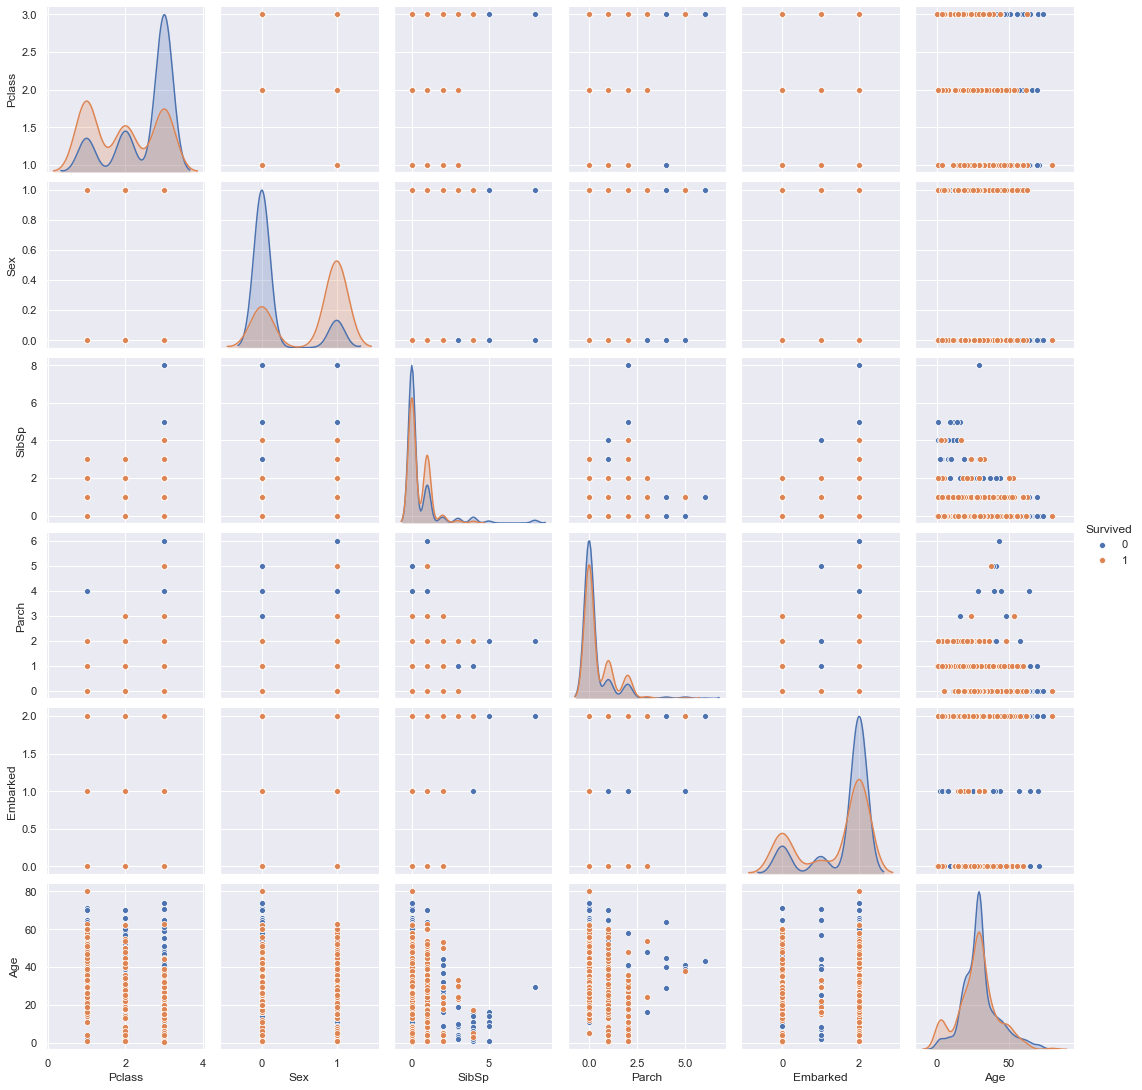

In [196]:
sns.pairplot(df,hue="Survived")

In [197]:
cr_matrix = df.corr()

In [201]:
cr_matrix

,Pclass,SibSp,Parch,Embarked,Survived,Age
Pclass,1.000000,0.081656,0.016824,0.164681,-0.335549,-0.328256
SibSp,0.081656,1.000000,0.414542,0.068900,-0.034040,-0.231908
Parch,0.016824,0.414542,1.000000,0.040449,0.083151,-0.178013
Embarked,0.164681,0.068900,0.040449,1.000000,-0.169718,-0.028659
Survived,-0.335549,-0.034040,0.083151,-0.169718,1.000000,-0.074513
Age,-0.328256,-0.231908,-0.178013,-0.028659,-0.074513,1.000000


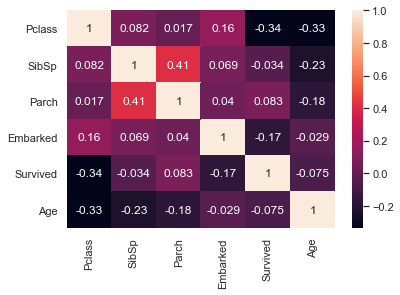

In [198]:
sns.heatmap(cr_matrix, annot=True)

In [215]:
col_fin = ["Pclass","Sex"]

In [216]:
X = data[col_fin]

In [217]:
y = target

In [218]:
def scale(train_data):
    scaler = StandardScaler()
    scaler.fit(train_data)
    x_scaled = scaler.transform(train_data)
    x_sca = pd.DataFrame(x_scaled)
    return scaler, x_sca

In [219]:
scaler,X_std = scale(X)

In [220]:
X_std

,0,1
0,0.825209,-0.735342
1,-1.572211,1.359911
2,0.825209,1.359911
3,-1.572211,1.359911
4,0.825209,-0.735342
...,...,...
884,-0.373501,-0.735342
885,-1.572211,1.359911
886,0.825209,1.359911
887,-1.572211,-0.735342


In [221]:
def stats(data, target):
    result = sm.OLS(target.astype(float),sm.add_constant(data.astype(float))).fit()
    print("result.summary()")
    return result

In [223]:
result = stats(X,target)

result.summary()


In [224]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Survived   R-squared:                       0.365
Model:                            OLS   Adj. R-squared:                  0.364
Method:                 Least Squares   F-statistic:                     255.1
Date:                Mon, 26 Oct 2020   Prob (F-statistic):           3.12e-88
Time:                        01:41:48   Log-Likelihood:                -417.79
No. Observations:                 889   AIC:                             841.6
Df Residuals:                     886   BIC:                             855.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5659      0.041     13.840      0.000       0.486       0.646
Pclass        -0.1577      0.016    -10.035      0.000      -0.189      -0.127
Sex            0.5163      0.027     18.789      0.000       0.462       0.570
==============================================================================
Omnibus:                       40.945   Durbin-Watson:                   1.918
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               45.720
Skew:                           0.554   Prob(JB):                     1.18e-10
Kurtosis:                       3.071   Cond. No.                         9.14
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [248]:
y = np.array(y).reshape(-1,)

In [249]:
y.shape

(889,)

In [304]:
X.dtypes

Pclass     int64
Sex       object
dtype: object

In [309]:
X.Sex=X.Sex.astype(int)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [310]:
X.dtypes

Pclass    int64
Sex       int64
dtype: object

In [311]:
X_train, X_test, y_train, y_test = split(X,y,0.3)

In [312]:
X_train_std, X_test_std, y_train_std, y_test_std= split(X_std,y,0.3)

In [313]:
#標準化したデータをトレーニングデータとテストデータの統合
X_combined_std = np.concatenate((X_train_std,X_test_std),axis=0)
y_combined_std = np.hstack((y_train_std,y_test_std))

In [314]:
#普通のデータをトレーニングデータとテストデータの統合
X_combined = np.concatenate((X_train,X_test),axis=0)
y_combined = np.hstack((y_train,y_test))

# 学習


In [315]:
from matplotlib.colors import ListedColormap

In [316]:
def plot_decision_regions(X,y,clf,test_idx,resolution=0.02):
    
    #マーカーとカラーマップの用意
    markers = ["s","x","o","^","v"]
    colors = ["red","blue","lightgreen","gray","cyan"]
    #yのラベルの数だけcolorsの色を前から使うことを宣言している 
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    #決定領域のプロット
    x1_min,x1_max = X[:,0].min()-1,X[:,0].max()+1
    x2_min,x2_max = X[:,1].min()-1,X[:,1].max()+1
    
    #グリッドポイントを生成
    xx1,xx2 = np.meshgrid(np.arange(x1_min,x1_max,resolution),
                         np.arange(x2_min,x2_max,resolution))
    
    #各特徴量を1次元配列に直して予測を実行
    Z = clf.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    
    #予測結果をもとのグリッドポイントデータサイズに変更
    Z =Z.reshape(xx1.shape)
    
    #グリッドポイントの等高線をプロット
    plt.contourf(xx1,xx2,Z,alpha=0.3,cmap=cmap)
    #軸の範囲の固定
    plt.xlim (xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())
    
    #クラスごとにサンプルをプロット
    for idx,cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl,0],y=X[y==cl,1],
                   alpha=0.8,
                   c=colors[idx],
                   marker=markers[idx],
                   label=cl,
                   edgecolors="black")
        
    #テストサンプルを目立たせる
    if test_idx:
        X_test,y_test = X[test_idx,:],y[test_idx]
        plt.scatter(X_test[:,0],X_test[:,1],
                   c = "",
                   edgecolors="black",
                   alpha=1,
                   linewidths=1,
                   marker = "o",
                   s =100,
                   label = "test set")

## ppn

In [317]:
from sklearn.linear_model import Perceptron

#エポック数(n_iterからmax_iterに変更された模様)=20,学習りつ0.01で学習
ppn = Perceptron(max_iter=30,eta0=0.01,random_state=43)

ppn.fit(X_train_std,y_train_std)


Perceptron(eta0=0.01, max_iter=30, random_state=43)

In [318]:
ppn.score(X_test_std,y_test_std)

0.6217228464419475

## ロジスティック回帰

In [319]:
from sklearn.linear_model import LogisticRegression

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=10.0,random_state=1) #Cは重み係数　→大きいほどトレーニングに適用
lr.fit(X_train_std,y_train_std)

lr.score(X_test_std,y_test_std)

0.8164794007490637

In [320]:
len(y_train)

622

/Users/ryusei/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:48: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


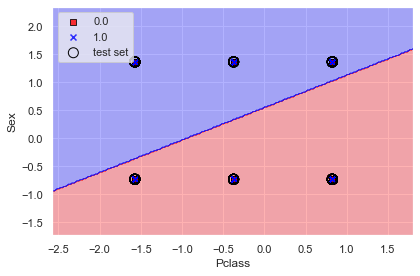

In [321]:
plot_decision_regions(X = X_combined_std,y = y_combined_std,
                     clf = lr,
                     test_idx=range(len(y_train),len(y_combined_std))) #テストデータの数分
plt.xlabel("Pclass")
plt.ylabel("Sex")
plt.legend(loc = "upper left") #左上に 凡例を表示
plt.tight_layout()
plt.show()

## SVM

In [322]:
from sklearn.svm import SVC

In [323]:
#gammaが高いほどトレーニングデータに適用したグラフになる
#kernel="liner"にすると直線になる
svm_rbf_lowgamma = SVC(kernel="rbf",random_state=1,gamma=1000,C=1.0) 

svm_rbf_lowgamma.fit(X_train_std,y_train_std)

svm_rbf_lowgamma.score(X_test_std,y_test_std)

0.8089887640449438

/Users/ryusei/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:48: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


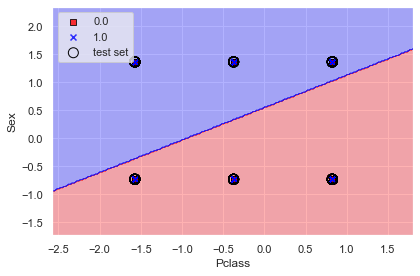

In [324]:
plot_decision_regions(X = X_combined_std,y = y_combined_std,
                     clf = lr,
                     test_idx=range(len(y_train),len(y_combined_std))) #テストデータの数分
plt.xlabel("Pclass")
plt.ylabel("Sex")
plt.legend(loc = "upper left") #左上に 凡例を表示
plt.tight_layout()
plt.show()

## ランダムフォレスト

In [325]:
from sklearn.ensemble import RandomForestClassifier

#決定木がたくさん集まっているからフォレスト
forest = RandomForestClassifier(criterion="gini",  
                               n_estimators=25,  #決定木の数
                               random_state=1,
                               n_jobs=2)

forest.fit(X_train,y_train)

forest.score(X_test,y_test)

0.8089887640449438

In [326]:
forest.feature_importances_

array([0.24345022, 0.75654978])

↑から男女が大きく関わってくることが確認できる

## k近傍法

In [327]:
from sklearn.neighbors import KNeighborsClassifier

#pは距離の種類(p=1:マンハッタン距離,p=2:ユークリッド距離)
knn = KNeighborsClassifier(n_neighbors=8,
                          p=2,
                          metric="minkowski")

knn.fit(X_train_std,y_train_std)

knn.score(X_test_std,y_test_std)

0.8089887640449438

## xgbboost

In [328]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

In [336]:
# サーチするパラメータをセット  
params = {  'n_estimators': [10, 20,4], 'max_depth':[ 6, 10],   
                  }  
# #交差検証+グリッドサーチにより最良パラメータの検索
# クラス分類用のモデルを作成  
model = XGBClassifier()  

clf = GridSearchCV(XGBClassifier(),params,cv=5)
clf.fit(X_train, y_train)  

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None,

In [337]:
print("最良パラメータ: {}".format(clf.best_params_))
print("最良交差検証スコア: {:.2f}".format(clf.best_score_))

最良パラメータ: {'max_depth': 6, 'n_estimators': 10}
最良交差検証スコア: 0.76


In [338]:
xgb_tree = XGBClassifier(max_depth=6, learning_rate=0.01, n_estimators=10, random_state=3)

In [339]:
xgb_tree.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=10, n_jobs=0, num_parallel_tree=1, random_state=3,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [340]:
print("訓練データスコア:",xgb_tree.score(X_train,y_train))
print("テストデータスコア",xgb_tree.score(X_test,y_test))

訓練データスコア: 0.7765273311897106
テストデータスコア 0.8089887640449438


## deeplearning

In [344]:
y_train_one = one_hot_encode(y_train_std)

In [345]:
y_test_one = one_hot_encode(y_test_std)

In [347]:
y_train_one.shape

(622, 2)

In [342]:
from keras import Sequential
from keras.layers import Dense

In [354]:
# Sequentialモデル使用(Sequentialモデルはレイヤを順に重ねたモデル)
model = Sequential()

# 結合層(2層->4層)
model.add(Dense(100, input_dim=2, activation="relu"))
model.add(Dense(100, activation="relu"))

# 結合層(4層->1層)：入力次元を省略すると自動的に前の層の出力次元数を引き継ぐ
model.add(Dense(2, activation="softmax"))

# モデルをコンパイル
model.compile(loss="categorical_crossentropy",optimizer="adam", metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 100)               300       
_________________________________________________________________
dense_8 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_9 (Dense)              (None, 2)                 202       
Total params: 10,602
Trainable params: 10,602
Non-trainable params: 0
_________________________________________________________________


In [355]:
model.fit(X_train_std,y_train_one,epochs=20)

Epoch 1/20
622/622 [==============================] - 0s 179us/step - loss: 0.5836 - accuracy: 0.7476
Epoch 2/20
622/622 [==============================] - 0s 35us/step - loss: 0.5019 - accuracy: 0.7733
Epoch 3/20
622/622 [==============================] - 0s 41us/step - loss: 0.4848 - accuracy: 0.7733
Epoch 4/20
622/622 [==============================] - 0s 37us/step - loss: 0.4801 - accuracy: 0.7701
Epoch 5/20
622/622 [==============================] - 0s 37us/step - loss: 0.4760 - accuracy: 0.7621
Epoch 6/20
622/622 [==============================] - 0s 36us/step - loss: 0.4780 - accuracy: 0.7781
Epoch 7/20
622/622 [==============================] - 0s 32us/step - loss: 0.4772 - accuracy: 0.7749
Epoch 8/20
622/622 [==============================] - 0s 34us/step - loss: 0.4792 - accuracy: 0.7717
Epoch 9/20
622/622 [==============================] - 0s 34us/step - loss: 0.4785 - accuracy: 0.7765
Epoch 10/20
622/622 [==============================] - 0s 33us/step - loss: 0.4778 - accur

In [357]:
history=model.evaluate(X_test_std,y_test_one)

267/267 [==============================] - 0s 21us/step


In [358]:
print("loss:", history[0], "accuracy:", history[1])

loss: 0.39636363250932444 accuracy: 0.8164793848991394
